In [1]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required packages the NumPy, Pandas and others

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing and Reading the dataset
df = pd.read_csv('Leads.csv')

# Save it into a dataframe called "df"

In [4]:
# Inspect the dataset - Look at the first few entries of table using head command

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Inspect the shape of the dataset
df.shape

(9240, 37)

In [6]:
# Understand numeric values of dataset 

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


As you can see, the feature variables are quite intuitive. If you don't understand them completely, please refer to the data dictionary.

In [7]:
# Cleaning data set
## Data contains select values hence Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('select',np.nan)

In [8]:
# Cleaning Data set by Converting all values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)


## Step 1: Data Cleaning and Preparation

In [9]:
# Check the number of missing values in each column
round(100*(df.isnull().sum()/len(df.index)), 2)
# As You can see there are many columns with missing values with some higher than 45%

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Checking if there are columns with one unique value since it may not impact our analysis
df.nunique()



Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
# We are dropping unique valued columns is it has no impact on our analysis
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [12]:
# Dropping columns with 35% or more of null values null values
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head()


,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [13]:
# Same goes for the variable 'Country'

# drop Country

In [14]:
# Let's now check the percentage of missing values in each column

round(100*(df2.isnull().sum()/len(df2.index)), 2)

# 4 Cloumns still have high null values but we will retain the ones with 35% or less and we will replace NaN values with 'not provided'

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [15]:
# Replacing NaN values in 4 columns with 'not provided'
df2['Specialization'] = df2['Specialization'].fillna('not provided') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [16]:
# Now we Recheck the % of missing values post substitution
round(100*(df2.isnull().sum()/len(df2.index)), 2)


Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [17]:
# Coutnry column has many values so we will create 3 categories
df2["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [18]:
# Coutnry column has many values so we will create 3 categories - India, not provided, outside India
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)
df2['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [19]:
# We need to Check % of data loss if the null values are removed
round(100*(sum(df2.isnull().sum(axis=1) > 1)/df2.shape[0]),2)

1.48

In [20]:
df3 = df2[df2.isnull().sum(axis=1) <1]


In [21]:
# Checking number of rows left in percent
round(100*(df3.shape[0])/(df.shape[0]),2)


98.2

In [22]:
# Code for checking number of rows left in percent
round(100*(df3.shape[0])/(df.shape[0]),2)

98.2

In [23]:
# Removing Id values since they are unique and not relevent for our analysis
df_final = df3.drop('Prospect ID',1)
df_final.shape



(9074, 21)

In [24]:
# EDA  Univariate Analysis 
# Anaylysis of Categorical Variables
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

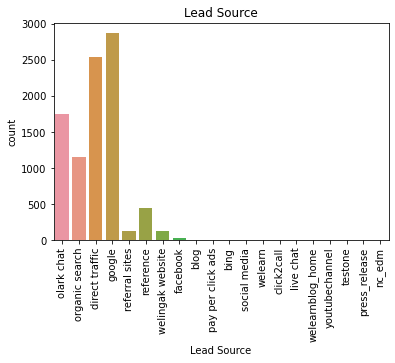

In [25]:
#Analysing Lead score against count
sns.countplot(df_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

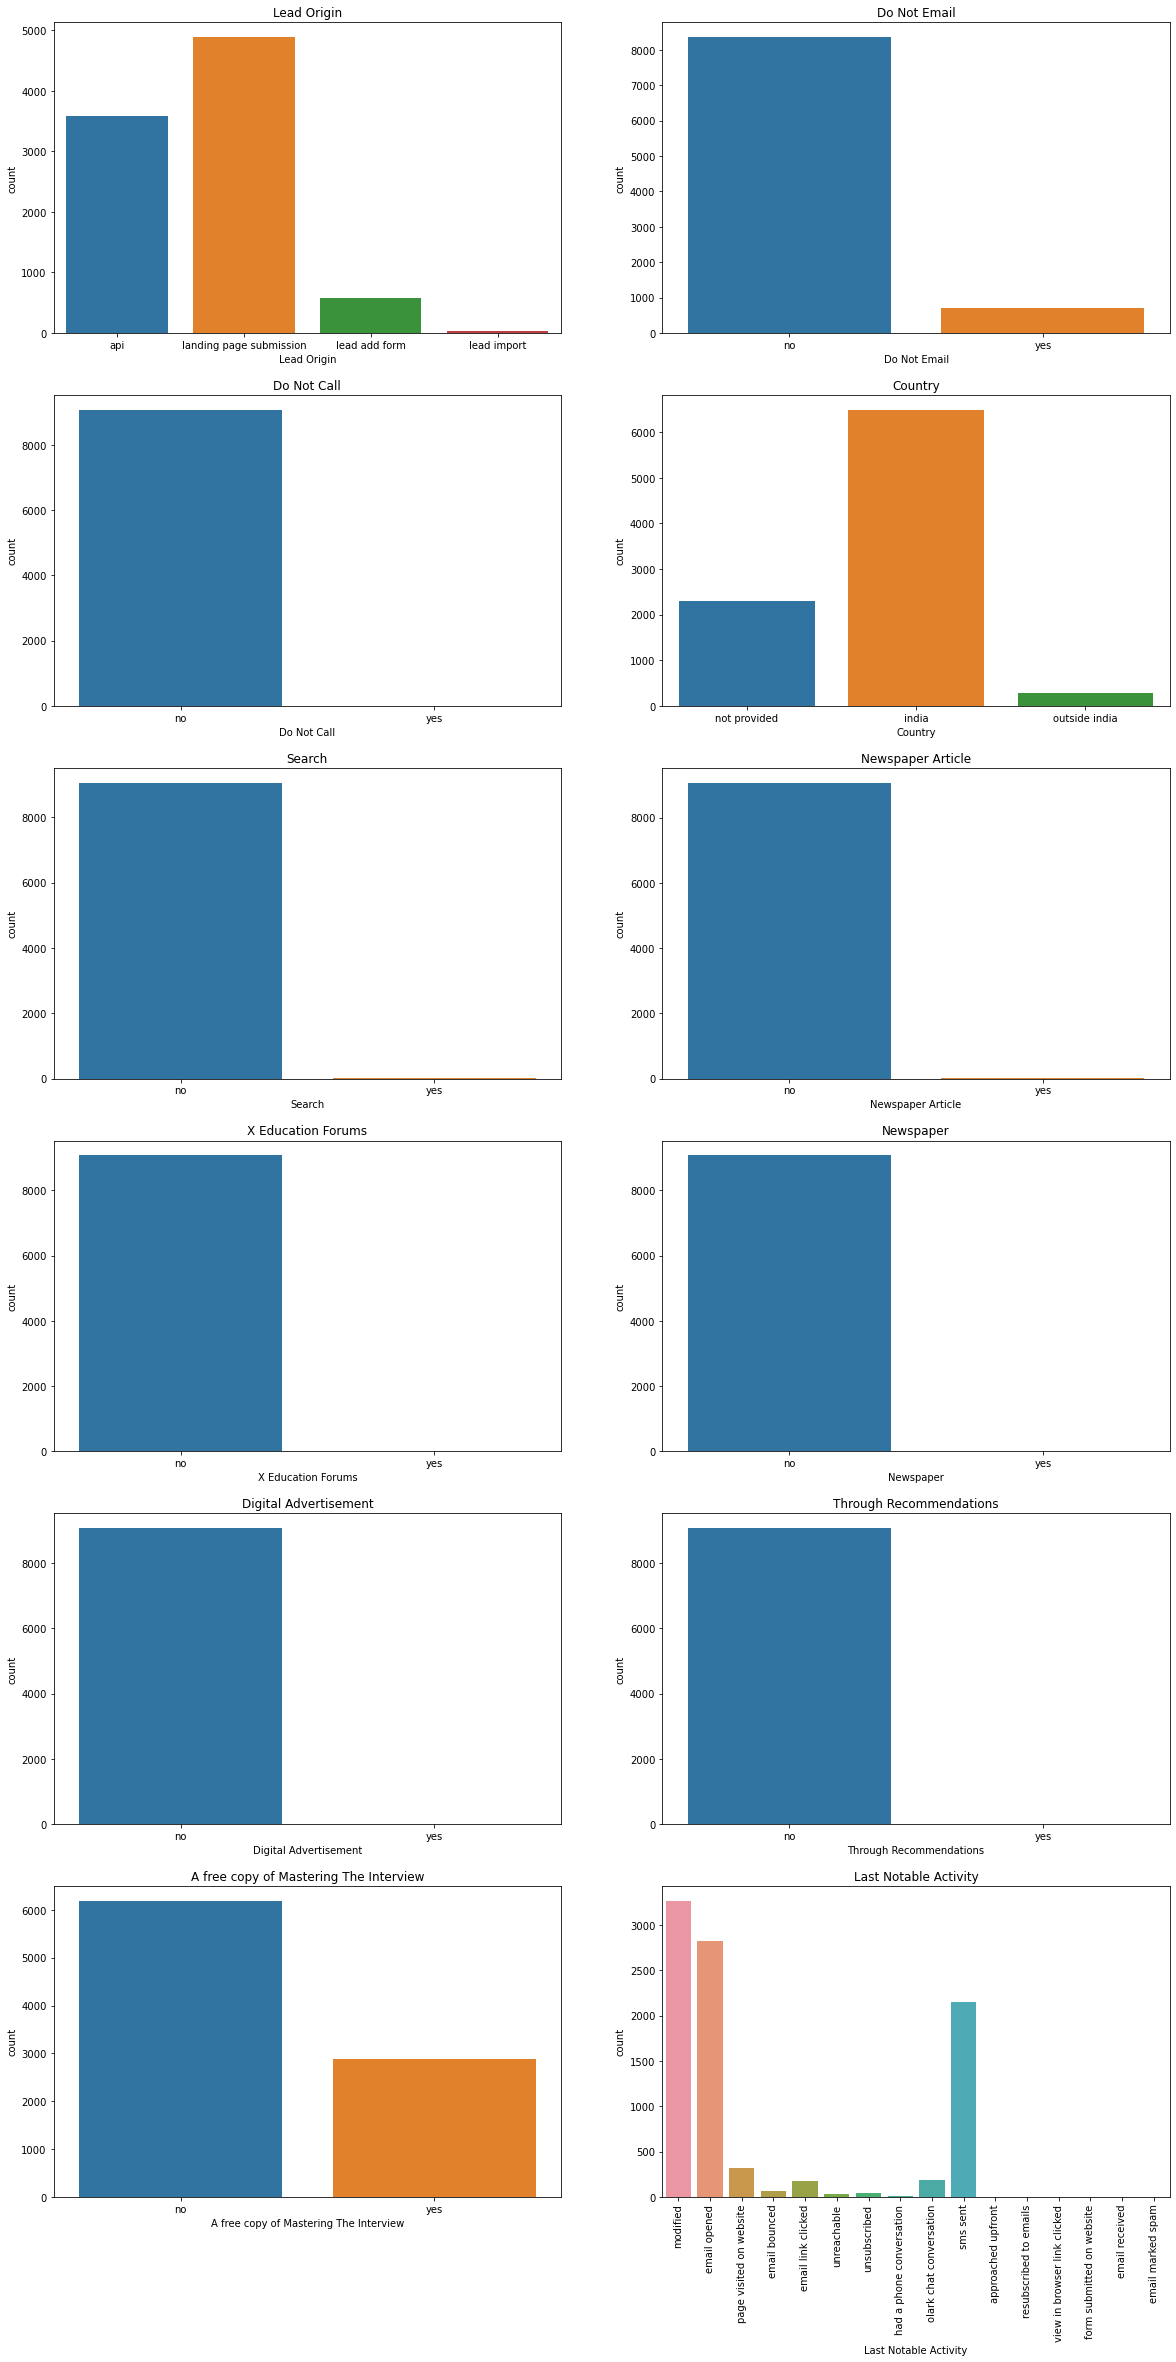

In [26]:
# Performing Univariate Analysis using barchart

plt.figure(figsize = (20,40))

plt.subplot(6,2,2)
sns.countplot(df_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,1)
sns.countplot(df_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,3)
sns.countplot(df_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

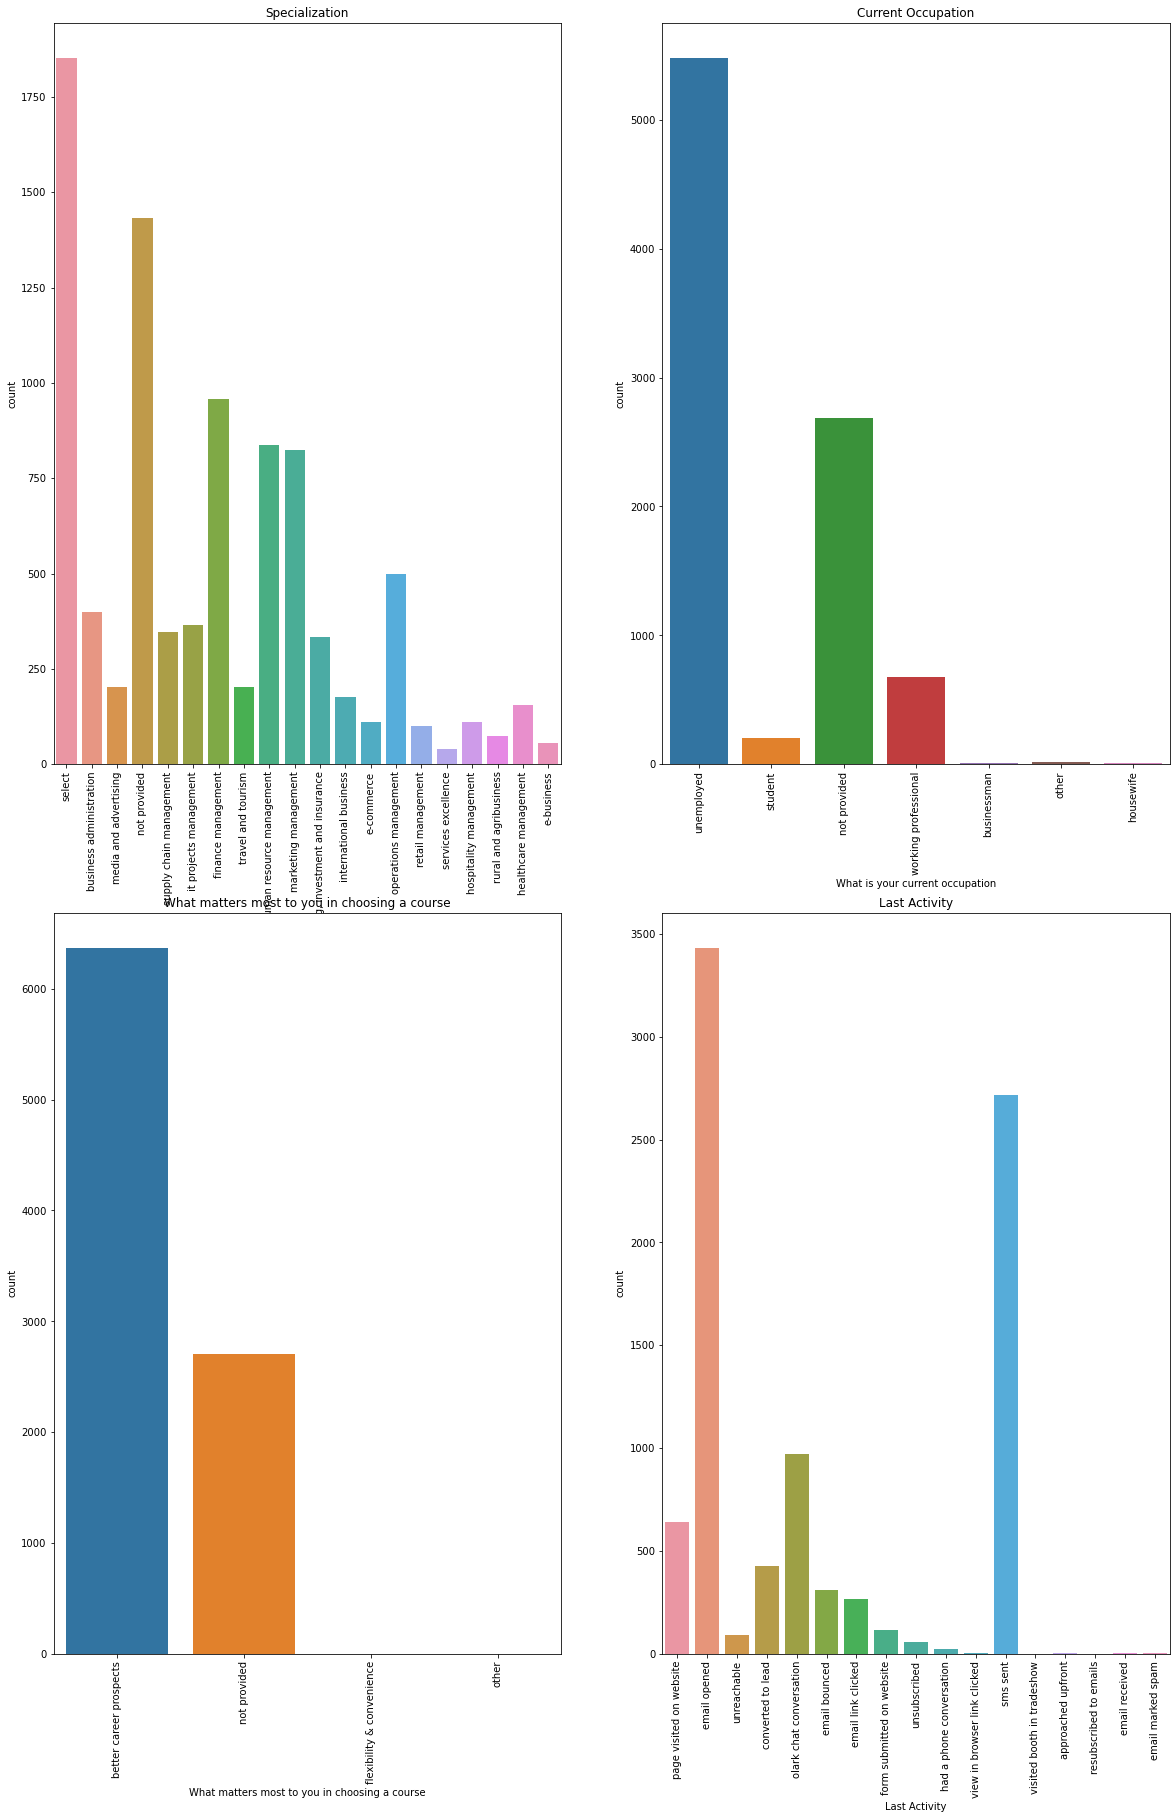

In [27]:
# Continuing with Univarate analysis against count
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(df_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(df_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

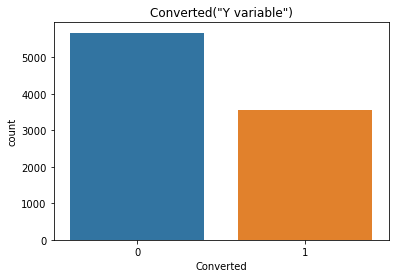

In [28]:
# Understanding distribution of Converted vs Y variable
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()


In [29]:
# Amalysing numeric variable for analysis
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

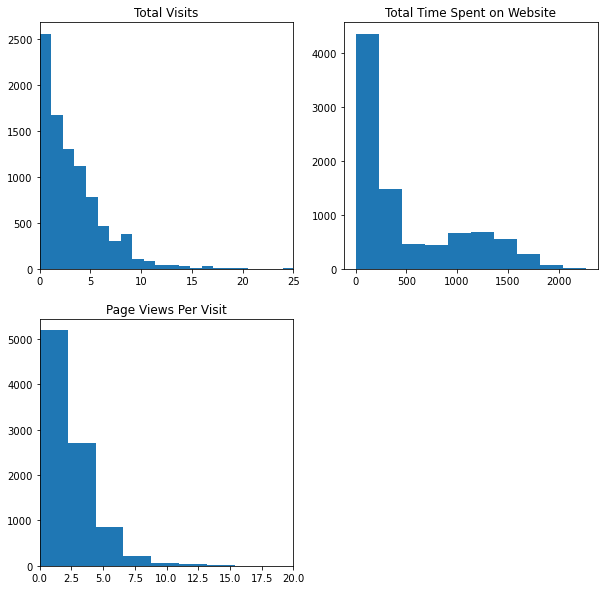

In [30]:
# Understanding distribution of Numeric variables like

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins = 220)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 25)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()


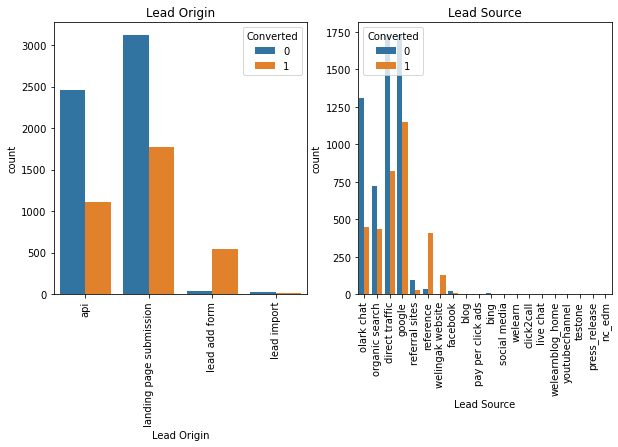

In [31]:
# Relating all the categorical variables to Converted

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

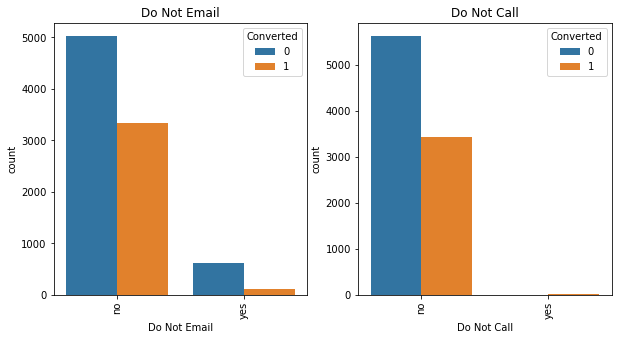

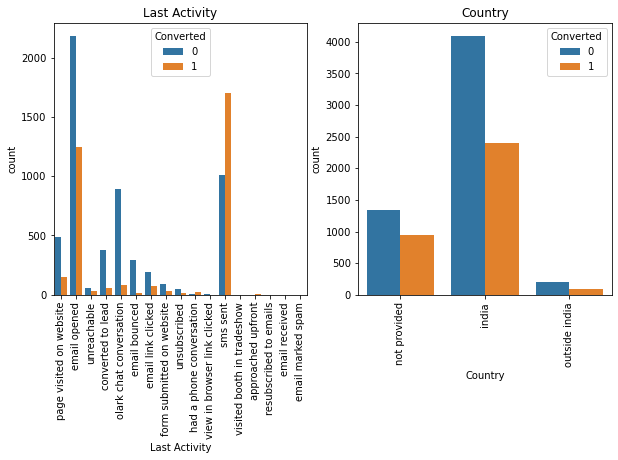

In [32]:
#Checking relation with coversion rate of e-mail and call Variable, Last Activity & Country
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()


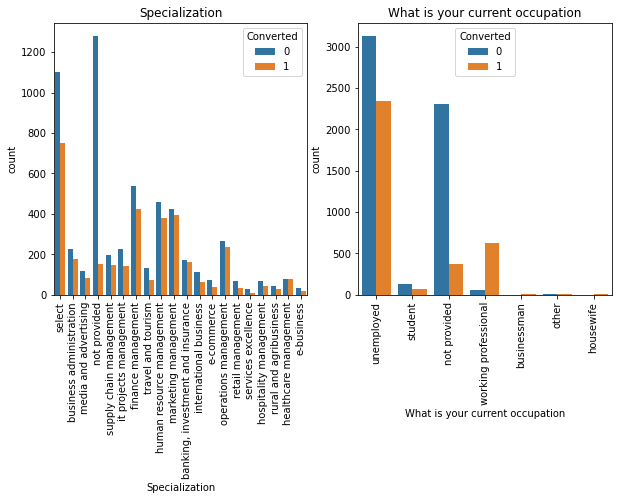

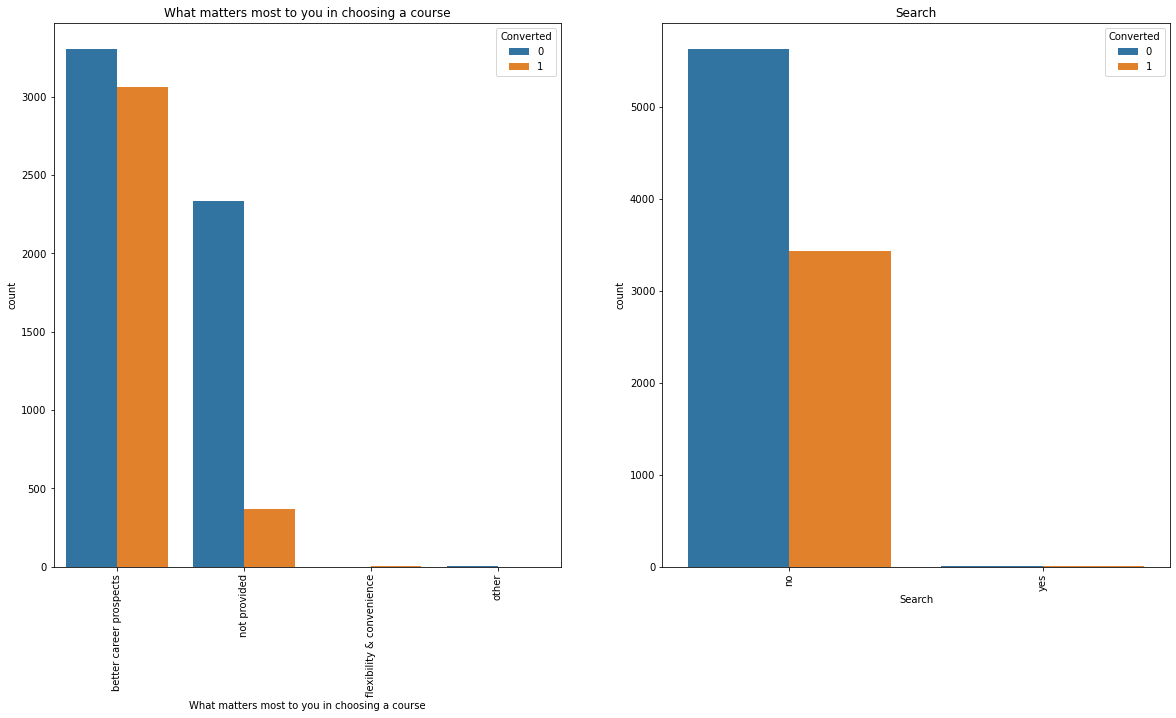

In [33]:
#Checking coversion w.r.t to Specialization & Occupation, Choosing course & search

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

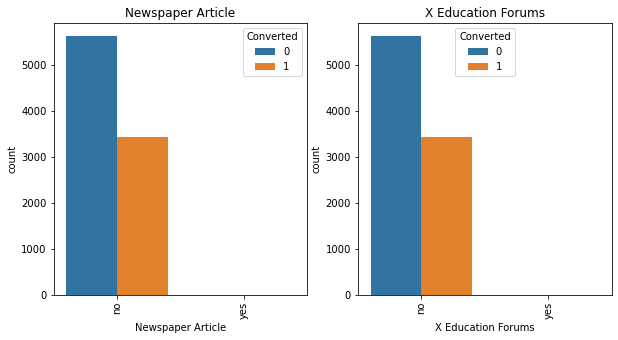

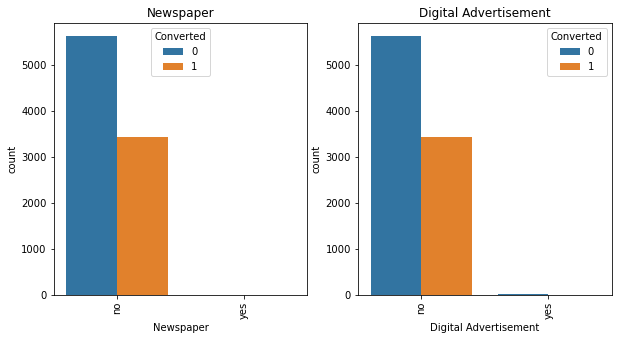

In [34]:
# Analysing impact of Newpaper Article & Education Forums

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

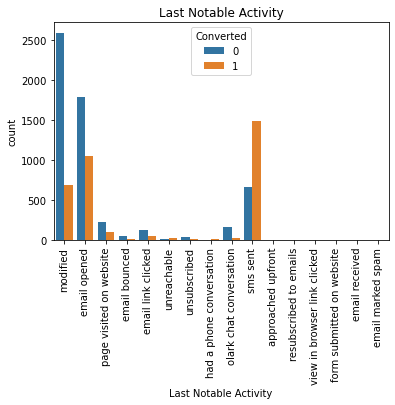

In [35]:
# Analysing last notable activity and it's impact

sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

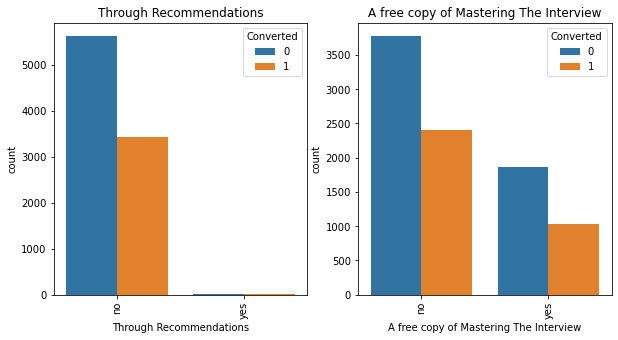

In [36]:
# Checking if recoomendations and free copy of mastering interview have impact 
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

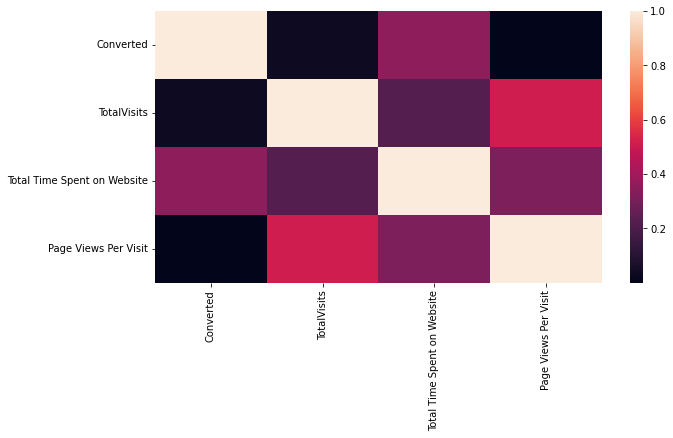

In [37]:
# Analysing co-realtion between variables like visits, time spent, views per visit
plt.figure(figsize=(10,5))
sns.heatmap(df_final.corr())
plt.show()
# The graph shows that these elements have little co-relation

In [38]:
# Stastical analysis of these variables indicates no major outliers hence we are not eliminating outliers
numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


In [39]:
# Performing Analysis and Model Budiling
# Creation of dummy variables
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [40]:
# Listing variables with Object values 
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [41]:
# Using 'get_dummies' Create dummy variables
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [42]:
df_final_dum = df_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## STEP 4. Test-Train Split

In [43]:
# Import the required library
from sklearn.model_selection import train_test_split

In [44]:
X = df_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [45]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [46]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [47]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


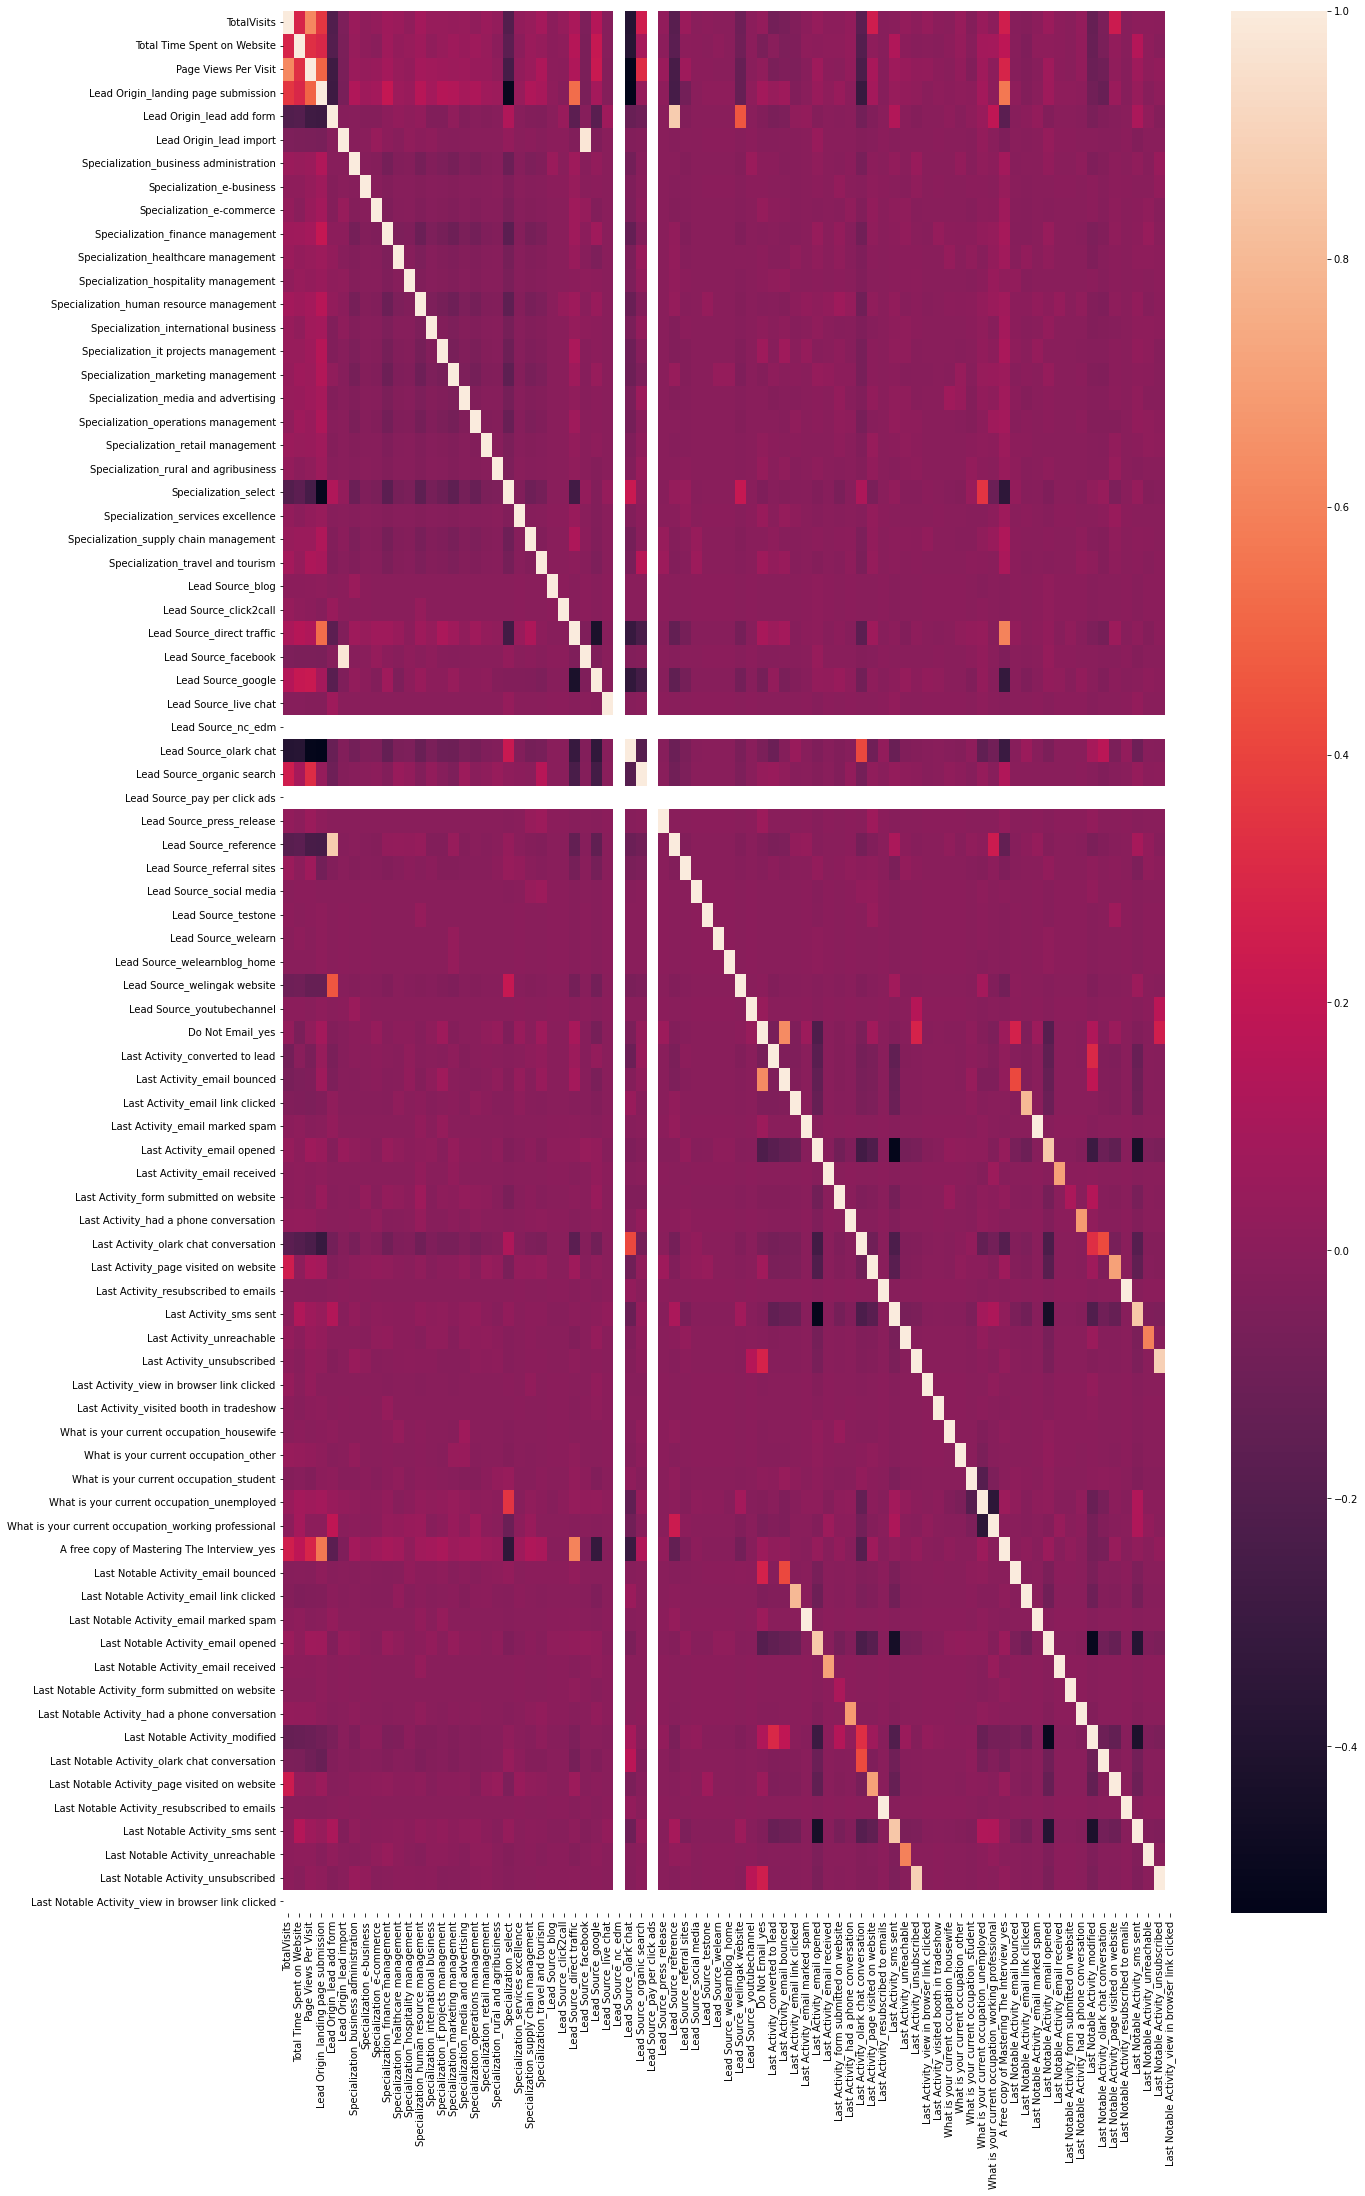

In [48]:
# To check the correlation among varibles
plt.figure(figsize=(20,35))
sns.heatmap(X_train.corr())
plt.show()

___Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE___



## STEP 5. Model Building


In [49]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Import RFE
from sklearn.feature_selection import RFE

In [51]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)


In [52]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', False, 12),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 25),
 ('Specialization_business administration', False, 39),
 ('Specialization_e-business', False, 34),
 ('Specialization_e-commerce', False, 27),
 ('Specialization_finance management', False, 36),
 ('Specialization_healthcare management', False, 31),
 ('Specialization_hospitality management', False, 4),
 ('Specialization_human resource management', False, 37),
 ('Specialization_international business', False, 46),
 ('Specialization_it projects management', False, 33),
 ('Specialization_marketing management', False, 28),
 ('Specialization_media and advertising', False, 53),
 ('Specialization_operations management', False, 32),
 ('Specialization_retail management', False, 17),
 ('Specialization_rural and agribusiness', False, 29),
 ('Specialization_select

In [53]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

___All the variables selected by RFE, next statistics part (p-values and the VIFs).___



In [54]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [55]:
# Importing statsmodels
import statsmodels.api as sm

In [56]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.0
Date:                Wed, 28 Dec 2022   Deviance:                       5242.0
Time:                        20:29:53   Pearson chi2:                 6.51e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3990
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9188      0.105    -18.227      0.000      -2.125      -1.712
TotalVisits                                              8.2168      1.855      4.429      0.000       4.581      11.853
Total Time Spent on Website                              4.6509      0.168     27.629      0.000       4.321       4.981
Page Views Per Visit                                    -1.8827      0.582     -3.236      0.001      -3.023      -0.742
Lead Origin_lead add form                                2.1606      0.227      9.500      0.000       1.715       2.606
Lead Source_direct traffic                              -1.6452      0.128    -12.825      0.000      -1.897      -1.394
Lead Source_google                                      -1.2911      0.126    -10.231      0.000      -1.538      -1.044
Lead Source_organic search                              -1.3934      0.155     -8.985      0.000      -1.697      -1.089
Lead Source_referral sites                              -1.2311      0.329     -3.737      0.000      -1.877      -0.585
Lead Source_welingak website                             2.5958      1.033      2.513      0.012       0.571       4.620
Do Not Email_yes                                        -1.3993      0.172     -8.146      0.000      -1.736      -1.063
Last Activity_had a phone conversation                   0.5701      0.856      0.666      0.506      -1.108       2.249
Last Activity_olark chat conversation                   -1.4134      0.168     -8.404      0.000      -1.743      -1.084
Last Activity_sms sent                                   1.3144      0.075     17.560      0.000       1.168       1.461
What is your current occupation_housewife               25.3472    3.1e+04      0.001      0.999   -6.08e+04    6.09e+04
What is your current occupation_other                    2.3071      0.767      3.008      0.003       0.804       3.810
What is your current occupation_student                  1.3078      0.229      5.717      0.000       0.859       1.756
What is your current occupation_unemployed               1.1834      0.086     13.697      0.000       1.014       1.353
What is your current occupation_working professional     3.7179      0.205     18.118      0.000       3.316       4.120
Last Notable Activity_had a phone conversation          23.4235   2.18e+04      0.001      0.999   -4.27e+04    4.27e+04
Last Notable Activity_unreachable                        1.8007      0.604      2.982      0.003       0.617       2.984
========================================================================================================================
"""

In [57]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.01
5,Lead Source_google,3.12
0,TotalVisits,2.97
4,Lead Source_direct traffic,2.82
16,What is your current occupation_unemployed,2.74
1,Total Time Spent on Website,2.38
6,Lead Source_organic search,2.28
10,Last Activity_had a phone conversation,1.90
18,Last Notable Activity_had a phone conversation,1.89
3,Lead Origin_lead add form,1.66


___The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation'___



In [59]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.0
Date:                Wed, 28 Dec 2022   Deviance:                       5242.0
Time:                        20:29:53   Pearson chi2:                 6.51e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3990
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9188      0.105    -18.227      0.000      -2.125      -1.712
TotalVisits                                              8.2168      1.855      4.429      0.000       4.581      11.853
Total Time Spent on Website                              4.6509      0.168     27.629      0.000       4.321       4.981
Page Views Per Visit                                    -1.8827      0.582     -3.236      0.001      -3.023      -0.742
Lead Origin_lead add form                                2.1606      0.227      9.500      0.000       1.715       2.606
Lead Source_direct traffic                              -1.6452      0.128    -12.825      0.000      -1.897      -1.394
Lead Source_google                                      -1.2911      0.126    -10.231      0.000      -1.538      -1.044
Lead Source_organic search                              -1.3934      0.155     -8.985      0.000      -1.697      -1.089
Lead Source_referral sites                              -1.2311      0.329     -3.737      0.000      -1.877      -0.585
Lead Source_welingak website                             2.5958      1.033      2.513      0.012       0.571       4.620
Do Not Email_yes                                        -1.3993      0.172     -8.146      0.000      -1.736      -1.063
Last Activity_had a phone conversation                   0.5701      0.856      0.666      0.506      -1.108       2.249
Last Activity_olark chat conversation                   -1.4134      0.168     -8.404      0.000      -1.743      -1.084
Last Activity_sms sent                                   1.3144      0.075     17.560      0.000       1.168       1.461
What is your current occupation_housewife               25.3472    3.1e+04      0.001      0.999   -6.08e+04    6.09e+04
What is your current occupation_other                    2.3071      0.767      3.008      0.003       0.804       3.810
What is your current occupation_student                  1.3078      0.229      5.717      0.000       0.859       1.756
What is your current occupation_unemployed               1.1834      0.086     13.697      0.000       1.014       1.353
What is your current occupation_working professional     3.7179      0.205     18.118      0.000       3.316       4.120
Last Notable Activity_had a phone conversation          23.4235   2.18e+04      0.001      0.999   -4.27e+04    4.27e+04
Last Notable Activity_unreachable                        1.8007      0.604      2.982      0.003       0.617       2.984
========================================================================================================================
"""

In [60]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.01
5,Lead Source_google,3.12
0,TotalVisits,2.97
4,Lead Source_direct traffic,2.82
16,What is your current occupation_unemployed,2.74
1,Total Time Spent on Website,2.38
6,Lead Source_organic search,2.28
10,Last Activity_had a phone conversation,1.90
18,Last Notable Activity_had a phone conversation,1.89
3,Lead Origin_lead add form,1.66


___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation housewife'___



In [61]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)


In [62]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.4
Date:                Wed, 28 Dec 2022   Deviance:                       5258.8
Time:                        20:31:19   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3974
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8994      0.105    -18.130      0.000      -2.105      -1.694
TotalVisits                                              8.1621      1.851      4.410      0.000       4.534      11.790
Total Time Spent on Website                              4.6458      0.168     27.648      0.000       4.316       4.975
Page Views Per Visit                                    -1.9113      0.581     -3.290      0.001      -3.050      -0.773
Lead Origin_lead add form                                2.1845      0.227      9.606      0.000       1.739       2.630
Lead Source_direct traffic                              -1.6327      0.128    -12.755      0.000      -1.884      -1.382
Lead Source_google                                      -1.2798      0.126    -10.162      0.000      -1.527      -1.033
Lead Source_organic search                              -1.3695      0.155     -8.858      0.000      -1.673      -1.066
Lead Source_referral sites                              -1.2242      0.329     -3.721      0.000      -1.869      -0.579
Lead Source_welingak website                             2.5787      1.033      2.496      0.013       0.554       4.603
Do Not Email_yes                                        -1.4037      0.172     -8.178      0.000      -1.740      -1.067
Last Activity_had a phone conversation                   0.5567      0.856      0.650      0.515      -1.121       2.234
Last Activity_olark chat conversation                   -1.4190      0.168     -8.444      0.000      -1.748      -1.090
Last Activity_sms sent                                   1.3062      0.075     17.479      0.000       1.160       1.453
What is your current occupation_other                    2.2840      0.767      2.979      0.003       0.781       3.787
What is your current occupation_student                  1.2844      0.229      5.619      0.000       0.836       1.732
What is your current occupation_unemployed               1.1614      0.086     13.526      0.000       0.993       1.330
What is your current occupation_working professional     3.6946      0.205     18.029      0.000       3.293       4.096
Last Notable Activity_had a phone conversation          22.4356   1.32e+04      0.002      0.999   -2.59e+04    2.59e+04
Last Notable Activity_unreachable                        1.7912      0.603      2.969      0.003       0.609       2.974
========================================================================================================================
"""

In [63]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.01
5,Lead Source_google,3.12
0,TotalVisits,2.97
4,Lead Source_direct traffic,2.82
15,What is your current occupation_unemployed,2.73
1,Total Time Spent on Website,2.38
6,Lead Source_organic search,2.28
10,Last Activity_had a phone conversation,1.90
17,Last Notable Activity_had a phone conversation,1.89
3,Lead Origin_lead add form,1.66


___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation other'___



In [64]:
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)


In [65]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.2
Date:                Wed, 28 Dec 2022   Deviance:                       5268.5
Time:                        20:32:45   Pearson chi2:                 6.54e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3965
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8824      0.104    -18.050      0.000      -2.087      -1.678
TotalVisits                                              8.4001      1.854      4.530      0.000       4.766      12.034
Total Time Spent on Website                              4.6544      0.168     27.712      0.000       4.325       4.984
Page Views Per Visit                                    -1.9103      0.581     -3.288      0.001      -3.049      -0.772
Lead Origin_lead add form                                2.1938      0.227      9.650      0.000       1.748       2.639
Lead Source_direct traffic                              -1.6276      0.128    -12.730      0.000      -1.878      -1.377
Lead Source_google                                      -1.2814      0.126    -10.187      0.000      -1.528      -1.035
Lead Source_organic search                              -1.3702      0.155     -8.866      0.000      -1.673      -1.067
Lead Source_referral sites                              -1.2342      0.329     -3.755      0.000      -1.878      -0.590
Lead Source_welingak website                             2.5794      1.033      2.497      0.013       0.555       4.604
Do Not Email_yes                                        -1.4096      0.172     -8.216      0.000      -1.746      -1.073
Last Activity_had a phone conversation                   0.5485      0.855      0.641      0.521      -1.128       2.225
Last Activity_olark chat conversation                   -1.4137      0.168     -8.421      0.000      -1.743      -1.085
Last Activity_sms sent                                   1.3000      0.075     17.420      0.000       1.154       1.446
What is your current occupation_student                  1.2594      0.228      5.514      0.000       0.812       1.707
What is your current occupation_unemployed               1.1372      0.085     13.346      0.000       0.970       1.304
What is your current occupation_working professional     3.6696      0.205     17.933      0.000       3.269       4.071
Last Notable Activity_had a phone conversation          22.4390   1.32e+04      0.002      0.999   -2.59e+04    2.59e+04
Last Notable Activity_unreachable                        1.7832      0.603      2.957      0.003       0.601       2.965
========================================================================================================================
"""

In [66]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.01
5,Lead Source_google,3.12
0,TotalVisits,2.96
4,Lead Source_direct traffic,2.81
14,What is your current occupation_unemployed,2.72
1,Total Time Spent on Website,2.38
6,Lead Source_organic search,2.28
10,Last Activity_had a phone conversation,1.90
16,Last Notable Activity_had a phone conversation,1.89
3,Lead Origin_lead add form,1.66


___All the VIF values are good and all the p-values are below 0.05. So we can fix model.___



## STEP 6. Creating Prediction


In [67]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.686743
3604    0.132109
5584    0.216966
7679    0.132109
7563    0.525439
7978    0.822074
7780    0.156811
7863    0.982501
838     0.787009
708     0.177853
dtype: float64

In [68]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.6867429 , 0.13210948, 0.2169661 , 0.13210948, 0.52543946,
       0.82207391, 0.15681069, 0.9825008 , 0.7870091 , 0.17785315])

In [69]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.686743
1,0,0.132109
2,0,0.216966
3,0,0.132109
4,0,0.525439


In [70]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.686743,1
1,0,0.132109,0
2,0,0.216966,0
3,0,0.132109,0
4,0,0.525439,1


## STEP 7. Model Evaluation


In [71]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [73]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3435,  460],
       [ 738, 1718]], dtype=int64)

In [74]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8113682884585105

___That's around 81% accuracy with is a very good value___



In [76]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [77]:
# Calculating the sensitivity
TP/(TP+FN)

0.6995114006514658

In [78]:
# Calculating the specificity
TN/(TN+FP)

0.8818998716302953

___With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 87%.___



## STEP 7. Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one



In [79]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [80]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


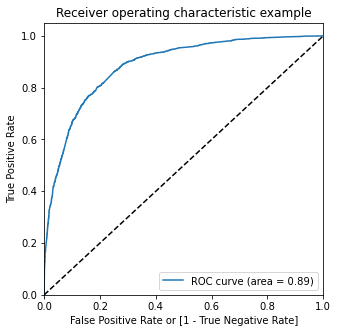

In [81]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

___The area under ROC curve is 0.87 which is a very good value.___



In [82]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.686743,1,1,1,1,1,1,1,1,0,0,0
1,0,0.132109,0,1,1,0,0,0,0,0,0,0,0
2,0,0.216966,0,1,1,1,0,0,0,0,0,0,0
3,0,0.132109,0,1,1,0,0,0,0,0,0,0,0
4,0,0.525439,1,1,1,1,1,1,1,0,0,0,0


In [83]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.590143,0.980456,0.344031
0.2,0.2,0.757519,0.917752,0.656483
0.3,0.3,0.789010,0.867264,0.739666
0.4,0.4,0.813100,0.768730,0.841078
0.5,0.5,0.811368,0.699511,0.881900
0.6,0.6,0.804125,0.631922,0.912709
0.7,0.7,0.774209,0.504886,0.944031
0.8,0.8,0.755157,0.421010,0.965854
0.9,0.9,0.709022,0.267508,0.987420


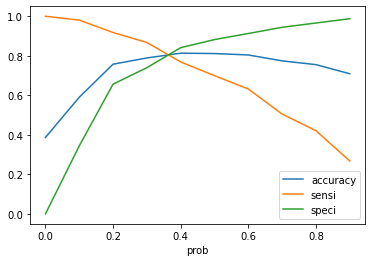

In [84]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

___From the graph it is visible that the optimal cut off is at 0.35.___



In [85]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.686743,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.132109,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.216966,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.132109,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.525439,1,1,1,1,1,1,1,0,0,0,0,1


In [86]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.805384978743505

In [87]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3139,  756],
       [ 480, 1976]], dtype=int64)

In [88]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [89]:
# Calculating the sensitivity
TP/(TP+FN)

0.8045602605863192

In [90]:
# Calculating the specificity
TN/(TN+FP)

0.8059050064184853

___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___



## STEP 8. Prediction on Test set


In [91]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [92]:
# Substituting all the columns in the final train model
col = X_train.columns

In [93]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_google,Lead Source_organic search,Lead Source_referral sites,Lead Source_welingak website,Do Not Email_yes,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_had a phone conversation,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,0.208333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
7212,1.0,0.028369,0.001320,0.166667,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2085,1.0,0.000000,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4048,1.0,0.028369,0.617077,0.083333,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
4790,1.0,0.028369,0.005282,0.083333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
8179,1.0,0.170213,0.148768,0.333333,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
6236,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5240,1.0,0.078014,0.458627,0.229167,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


In [95]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()



,Converted,Conversion_Prob
0,0,0.369841
1,1,0.837955
2,1,0.982501
3,1,0.867435
4,0,0.093714


In [96]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.369841,1
1,1,0.837955,1
2,1,0.982501,1
3,1,0.867435,1
4,0,0.093714,0
...,...,...,...
2718,1,0.103501,0
2719,0,0.406524,1
2720,0,0.132109,0
2721,1,0.835562,1


In [97]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.808666911494675

In [98]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1403,  341],
       [ 180,  799]], dtype=int64)

In [99]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [100]:
# Calculating the sensitivity
TP/(TP+FN)

0.8161389172625128

In [101]:
# Calculating the specificity
TN/(TN+FP)

0.8044724770642202

___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___



## STEP 9. Precision-Recall


In [102]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3435,  460],
       [ 738, 1718]], dtype=int64)

In [103]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7887970615243343

In [104]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6995114006514658

___With the current cut off as 0.35 we have Precision around 78% and Recall around 70%___



### 9.1. Precision and recall tradeoff


In [106]:
from sklearn.metrics import precision_recall_curve


In [107]:
y_train_pred_final.Converted, y_train_pred_final.Predicted


(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

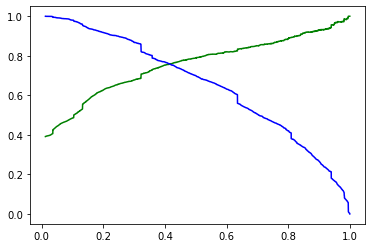

In [113]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g")
plt.plot(thresholds, r[:-1], "b")
plt.show()

In [114]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.686743,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.132109,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.216966,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.132109,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.525439,1,1,1,1,1,1,1,0,0,0,0,1


In [115]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.812627932609038

In [116]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3291,  604],
       [ 586, 1870]], dtype=int64)

In [117]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [118]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7558609539207761

In [119]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.761400651465798

___With the current cut off as 0.41 we have Precision around 74% and Recall around 76%___



## STEP 10. Prediction on Test set


In [122]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.369841
1,1,0.837955
2,1,0.982501
3,1,0.867435
4,0,0.093714


In [125]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.369841,0
1,1,0.837955,1
2,1,0.982501,1
3,1,0.867435,1
4,0,0.093714,0
...,...,...,...
2718,1,0.103501,0
2719,0,0.406524,0
2720,0,0.132109,0
2721,1,0.835562,1


In [126]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)


0.8163789937568858

In [127]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1478,  266],
       [ 234,  745]], dtype=int64)

In [128]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [129]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7368941641938674

In [130]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7609805924412666

___With the current cut off as 0.41 we have Precision around 73% and Recall around 75%___



### Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :

    1.The total time spend on the Website.
    2.Total number of visits.
    3.When the lead source was:
a. Google
b. Direct traffic
c. Organic search
d. Welingak website
4. When the last activity was:
a. SMS
b. Olark chat conversation
5. When the lead origin is Lead add format. 6. When their current occupation is as a working professional.
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.